In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ler os dados com o geopandas
data = gpd.read_file('C:\\Users\\Fernandinho\\Desktop\\data-science\\dados-geoespaciais\\DF_Municipios_2022\\DF_Municipios_2022.shp')

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [4]:
data.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


<Axes: >

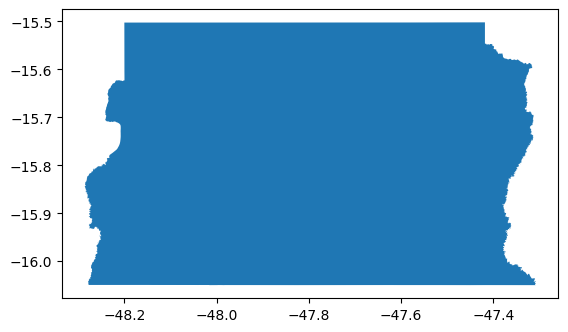

In [5]:
data.plot()

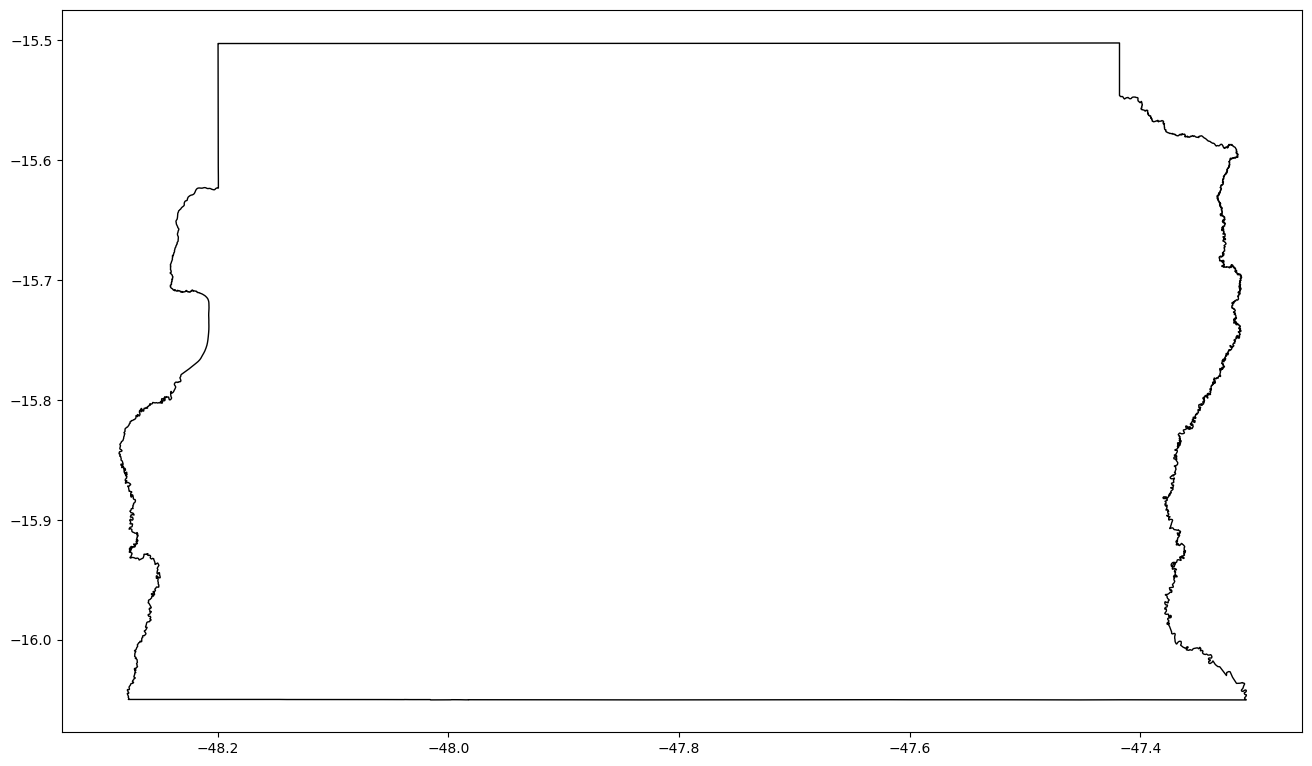

In [6]:
data.plot(figsize=(16,14), facecolor='white', edgecolor='black')
plt.show()

In [7]:
#filtrar somente o Distrito Federal
gdf_df = data[data['NM_MUN'] == 'Brasília']
gdf_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


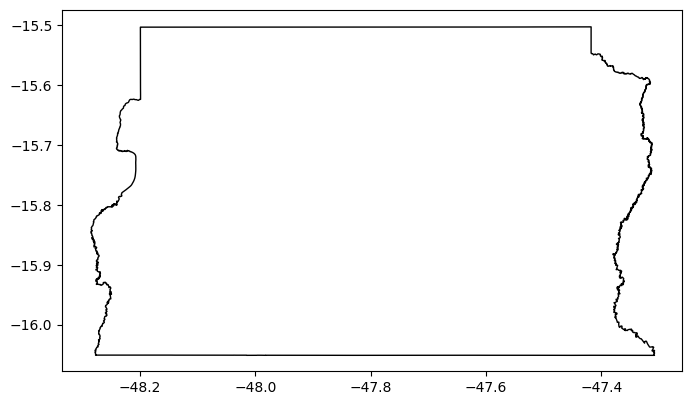

In [8]:
# mostrar a região filtrada
gdf_df = data[data['NM_MUN'] == 'Brasília']
gdf_df.plot(figsize=(8, 8), facecolor="white", edgecolor="black")
plt.show()

In [9]:
# salvar o geodataframe com formato geojson
filename = "DF_Municipios_2022.json"
gdf_df.to_file(filename, driver="GeoJSON")

In [10]:
gdf_df = gpd.read_file(filename, driver="GeoJSON")
gdf_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


In [11]:
# Importar os objetos geométricos da biblioteca shapely 
from shapely.geometry import Point, LineString, Polygon

In [12]:
# Criar uma geometria do tipo ponto
ponto = Point(5, 10)

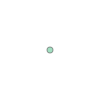

In [13]:
ponto

In [14]:
print (ponto)

POINT (5 10)


In [15]:
type(ponto)

shapely.geometry.point.Point

In [16]:
# Utilizando a função coords
list (ponto.coords)

[(5.0, 10.0)]

In [17]:
# Lendo x e y separadamente
x = ponto.x
y = ponto.y
print(x , y)

5.0 10.0


In [18]:
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
distancia = ponto_1.distance(ponto_2)
print("Distância entre os pontos:", distancia)

Distância entre os pontos: 5.0


In [19]:
# Criar um linha a partir de objetos pontos
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
ponto_3 = Point(2,10)
linha = LineString([ponto_1, ponto_2, ponto_3])

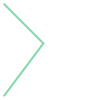

In [20]:
linha

In [21]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [22]:
type(linha)

shapely.geometry.linestring.LineString

In [23]:
# Utilizando a função coords
list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0)]

In [24]:
#lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print('coordenadas_x:', coordenadas_x)
print('coordenadas_y:', coordenadas_y)


coordenadas_x: [2.0, 5.0, 2.0]
coordenadas_y: [3.0, 7.0, 10.0]


In [25]:
#pegar o comprimento da linha
linha.length

9.242640687119284

In [26]:
# Obter o ponto central (centróide)
print(linha.centroid)

POINT (3.5000000000000004 6.606601717798214)


In [27]:
# Criar um polygon passando as coordenadas
poly = Polygon([(2,3),(5,7),(2,10)])

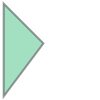

In [28]:
poly

In [29]:
print(poly)

POLYGON ((2 3, 5 7, 2 10, 2 3))


In [30]:
type(poly)

shapely.geometry.polygon.Polygon

In [31]:
#  Obter as coordenadas do poligono
list(poly.exterior.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (2.0, 3.0)]

In [32]:
# Calcular a área
poly_area = poly.area
print ('Área=', poly_area)

Área= 10.5


In [33]:
# Pegar o centroide do polígono
poly_centroid = poly.centroid
print('Centróide:', poly_centroid)

Centróide: POINT (3 6.666666666666667)


In [34]:
# Obter as coordenadas do bounding box
poly.bounds

(2.0, 3.0, 5.0, 10.0)

In [35]:
# Pegar as coordenadas da linha exterior
poly_exterior = poly.exterior
print('Exterior:', poly_exterior)

Exterior: LINEARRING (2 3, 5 7, 2 10, 2 3)


In [36]:
# Obter o tamanho da linha exterior
poly_exterior_length = poly.exterior.length
print('Comprimento exterior:', poly_exterior_length)

Comprimento exterior: 16.242640687119284


In [37]:
import pandas as pd

In [38]:
# Ler os dados com pandas
filename = r'C:\\Users\\Fernandinho\\Desktop\data-science\\dados-geoespaciais\\DF_Municipios_2022\\furtos contra patrimônio.xlsx'
df_furtos = pd.read_excel(filename)

In [39]:
# Mostrar os dados com a função head

df_furtos.head()


,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude
0,RA 01_BRASILIA,217073.0,1086.0,490.7,715.0,316.7,543.0,235.8,504.0,224.2,563.0,256.5,3411.0,-15.793404,-47.882317
1,RA 02_GAMA,132404.0,308.0,232.5,355.0,257.3,230.0,160.1,297.0,216.3,151.0,115.0,1341.0,-16.026111,-48.063056
2,RA 03_TAGUATINGA,210142.0,793.0,385.6,760.0,367.3,596.0,286.3,478.0,227.1,512.0,240.6,3139.0,-15.833528,-48.056572
3,RA 04_BRAZLANDIA,53534.0,45.0,84.1,47.0,80.3,44.0,68.7,48.0,85.9,45.0,92.3,229.0,-15.680890,-48.194262
4,RA 05_SOBRADINHO,69363.0,154.0,256.3,120.0,183.5,61.0,85.7,67.0,91.2,87.0,114.8,489.0,-15.650053,-47.784845


In [40]:
# Tratando os dados e deixando espaços em branco
df_furtos = df_furtos.fillna('')
df_furtos = df_furtos.rename(columns={'Unnamed: 0':'','Unnamed: 11':'','Unnamed: 12':''})


In [41]:
df_furtos.head(40)

,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude
0,RA 01_BRASILIA,217073.0,1086.0,490.7,715.0,316.7,543.0,235.8,504.0,224.2,563.0,256.5,3411.0,-15.793404,-47.882317
1,RA 02_GAMA,132404.0,308.0,232.5,355.0,257.3,230.0,160.1,297.0,216.3,151.0,115.0,1341.0,-16.026111,-48.063056
2,RA 03_TAGUATINGA,210142.0,793.0,385.6,760.0,367.3,596.0,286.3,478.0,227.1,512.0,240.6,3139.0,-15.833528,-48.056572
3,RA 04_BRAZLANDIA,53534.0,45.0,84.1,47.0,80.3,44.0,68.7,48.0,85.9,45.0,92.3,229.0,-15.68089,-48.194262
4,RA 05_SOBRADINHO,69363.0,154.0,256.3,120.0,183.5,61.0,85.7,67.0,91.2,87.0,114.8,489.0,-15.650053,-47.784845
5,RA 06_PLANALTINA,130204.0,253.0,142.5,183.0,98.1,137.0,69.9,118.0,63.3,97.0,54.7,788.0,-15.618195,-47.65557
6,RA 07_PARANOA,65519.0,95.0,145.0,87.0,124.4,77.0,103.1,38.0,54.4,63.0,96.4,360.0,-15.77544,-47.779763
7,RA 08_NUCLEO BANDEIRANTE,24786.0,44.0,186.3,55.0,230.9,72.0,299.8,40.0,166.0,44.0,182.1,255.0,-15.871185,-47.967994
8,RA 09_CEILANDIA,349955.0,687.0,199.1,784.0,224.7,635.0,180.0,569.0,162.4,667.0,191.7,3342.0,-15.817339,-48.104577
9,RA 10_GUARA,133748.0,152.0,113.4,189.0,137.7,186.0,132.3,157.0,110.5,111.0,77.3,795.0,-15.823563,-47.976816


In [42]:
# Mostrar todas as colunas para ver se temos informações de latitude e longitude
df_furtos.columns

Index(['CID_MUN', 'População', '2018 Reg. Ocorrências ',
       '2018 Tx 100 mil hab.', '2019 Reg. Ocorrências', '2019 Tx 100 mil hab.',
       '2020 Reg. Ocorrências', '2020 Tx 100 mil hab.',
       '2021 Reg. Ocorrências', '2021 Tx 100 mil hab.',
       '2022 Reg. Ocorrências', '2022 Tx 100 mil hab.', 'qtd_furtos',
       'Latitude', 'Longitude'],
      dtype='object')

In [43]:
#Apenas os dados de latitude e longitude
df_furtos[['Latitude', 'Longitude']]

,Latitude,Longitude
0,-15.793404,-47.882317
1,-16.026111,-48.063056
2,-15.833528,-48.056572
3,-15.68089,-48.194262
4,-15.650053,-47.784845
5,-15.618195,-47.65557
6,-15.77544,-47.779763
7,-15.871185,-47.967994
8,-15.817339,-48.104577
9,-15.823563,-47.976816


In [44]:
# Casou houvessem dados em branco nas coordenadas poderiamos usar o dropna com parâmetro subset para remover os dados em branco
# df_furtos = df_furtos.dropna(subset=['Latitude','Longitude'])
# df_furtos[['Latitude','Longitude']]

In [45]:
# Criando GeoDataFrame
# Importar a classe point da biblioteca Shapely
from shapely.geometry import Point

In [46]:
# Criar a nossa coluna geometry
df_furtos['geometry'] = None


for index, row in df_furtos.iterrows():
    if pd.notna(row.Longitude) and pd.notna(row.Latitude) and row.Longitude != '' and row.Latitude != '':
        df_furtos.loc[index, 'geometry'] = Point(float(row.Longitude), float(row.Latitude))


In [47]:
df_furtos.head()

,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude,geometry
0,RA 01_BRASILIA,217073.0,1086.0,490.7,715.0,316.7,543.0,235.8,504.0,224.2,563.0,256.5,3411.0,-15.793404,-47.882317,POINT (-47.882317 -15.793404)
1,RA 02_GAMA,132404.0,308.0,232.5,355.0,257.3,230.0,160.1,297.0,216.3,151.0,115.0,1341.0,-16.026111,-48.063056,POINT (-48.063056 -16.026111)
2,RA 03_TAGUATINGA,210142.0,793.0,385.6,760.0,367.3,596.0,286.3,478.0,227.1,512.0,240.6,3139.0,-15.833528,-48.056572,POINT (-48.056572 -15.833528)
3,RA 04_BRAZLANDIA,53534.0,45.0,84.1,47.0,80.3,44.0,68.7,48.0,85.9,45.0,92.3,229.0,-15.68089,-48.194262,POINT (-48.194262 -15.68089)
4,RA 05_SOBRADINHO,69363.0,154.0,256.3,120.0,183.5,61.0,85.7,67.0,91.2,87.0,114.8,489.0,-15.650053,-47.784845,POINT (-47.784845 -15.650053)


In [48]:
# Conferindo o tipo de dataframe
type(df_furtos)

pandas.core.frame.DataFrame

In [49]:
# Importar a biblioteca geopandas
import geopandas as gpd 

In [50]:
# Criar o GeoDataFrame
gdf_furtos = gpd.GeoDataFrame(df_furtos, geometry='geometry')

In [51]:
# Conferindo o tipe do dataframe após a trasformação
type(gdf_furtos)

geopandas.geodataframe.GeoDataFrame

In [52]:
gdf_furtos.head(5)

,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude,geometry
0,RA 01_BRASILIA,217073.0,1086.0,490.7,715.0,316.7,543.0,235.8,504.0,224.2,563.0,256.5,3411.0,-15.793404,-47.882317,POINT (-47.88232 -15.79340)
1,RA 02_GAMA,132404.0,308.0,232.5,355.0,257.3,230.0,160.1,297.0,216.3,151.0,115.0,1341.0,-16.026111,-48.063056,POINT (-48.06306 -16.02611)
2,RA 03_TAGUATINGA,210142.0,793.0,385.6,760.0,367.3,596.0,286.3,478.0,227.1,512.0,240.6,3139.0,-15.833528,-48.056572,POINT (-48.05657 -15.83353)
3,RA 04_BRAZLANDIA,53534.0,45.0,84.1,47.0,80.3,44.0,68.7,48.0,85.9,45.0,92.3,229.0,-15.68089,-48.194262,POINT (-48.19426 -15.68089)
4,RA 05_SOBRADINHO,69363.0,154.0,256.3,120.0,183.5,61.0,85.7,67.0,91.2,87.0,114.8,489.0,-15.650053,-47.784845,POINT (-47.78484 -15.65005)


<Axes: >

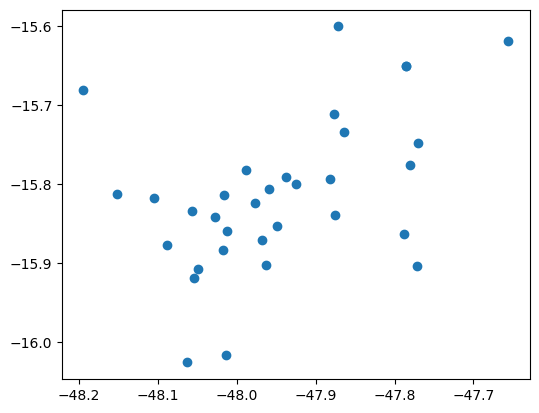

In [53]:
# Mostrar os dados usando a função plot
gdf_furtos.plot()

In [54]:
# Carregar os dados do Distrito Federal
filename = 'DF_Municipios_2022.json'
gdf_capital_DF = gpd.read_file(filename, driver='GeoJSON')

<Axes: >

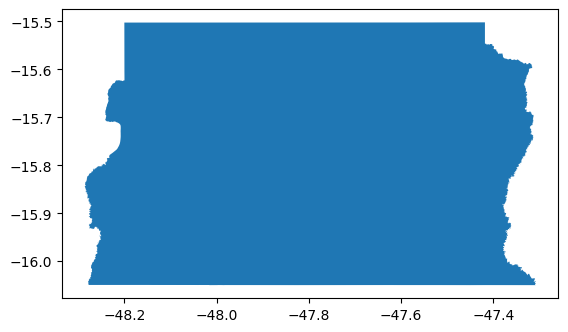

In [55]:
# Mostrar os dados carregados com a função plot
gdf_capital_DF.plot()

In [56]:
# Importar a biblioteca matplotlib
import matplotlib.pyplot as plt

<Axes: >

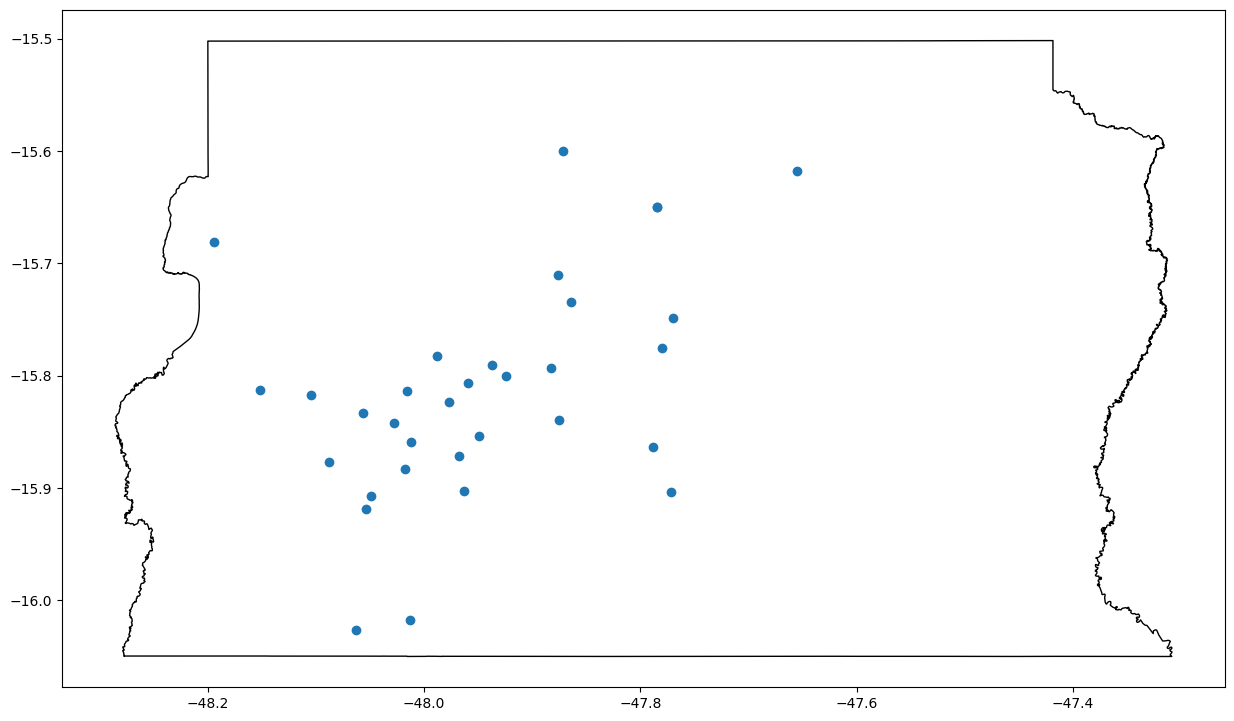

In [57]:
# Mostrar os dados com matplotlib
fig, ax = plt.subplots(figsize=(15,15))

gdf_furtos.plot(ax=ax)
gdf_capital_DF.plot(ax=ax, facecolor='None', edgecolor='black')

In [58]:
# Pegar o polygon do DF
polygon_DF = gdf_capital_DF.iloc[0].geometry

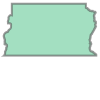

In [59]:
# Mostrar o polygon no juyter
polygon_DF

In [60]:
# Fazer a operação de interseção entre as geometrias
gdf_furtos.intersects(polygon_DF)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33    False
34    False
dtype: bool

In [61]:
# Interseção entre as geometrias das regiões administrativas
gdf_furtos_capital_DF = gdf_furtos[gdf_furtos.intersects(polygon_DF)]

<Axes: >

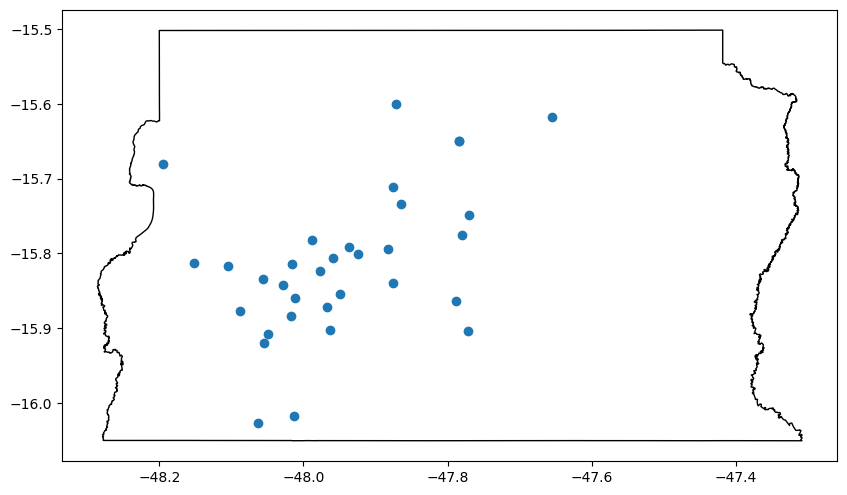

In [62]:
# Mostrar os dados com matplotlib
fig, ax = plt.subplots(figsize=(10,10))

gdf_furtos_capital_DF.plot(ax=ax)
gdf_capital_DF.plot(ax=ax, facecolor='None', edgecolor='black')

In [63]:
#Salvando os dados de furtos no Distrito Federal
filename = 'furtos contra patrimônio.json'
gdf_furtos_capital_DF.to_file(filename, driver='GeoJSON')

In [64]:
# Importar a biblioteca geopandas
import geopandas as gpd
# Importar a biblioteca folium
import folium

In [65]:
# Criando um mapa simples usando folium
fmap = folium.Map()
fmap

In [66]:
# Carregando os dados de furtos
gdf_furtos = gpd.read_file('furtos contra patrimônio.json', driver="GeoJSON")
# Carregando os dados de geometria
gdf_geometria_DF = gpd.read_file("DF_Municipios_2022.json", driver="GeoJSON")

In [67]:
gdf_furtos_slice = gdf_furtos.iloc[:100] # Quero todos os dados até o valor[]

fmap = folium.Map()  #mapa

feat_geojson = folium.features.GeoJson(gdf_furtos_slice)

fmap.add_child(feat_geojson) 
fmap

In [137]:
# Melhorando a inicialização do mapa, quando o mapa aparecer já apareça em determinada localização (zoom)
import folium

# Convertendo os valores de Latitude e Longitude para números
gdf_furtos_slice['Latitude'] = pd.to_numeric(gdf_furtos_slice['Latitude'], errors='coerce')
gdf_furtos_slice['Longitude'] = pd.to_numeric(gdf_furtos_slice['Longitude'], errors='coerce')

# Calculando a média das coordenadas
media_latitude = gdf_furtos_slice['Latitude'].mean()
media_longitude = gdf_furtos_slice['Longitude'].mean()

# Inicializando o mapa
fmap = folium.Map(location=[media_latitude, media_longitude])

# Criando um objeto GeoJson para adicionar ao mapa
feat_geojson = folium.features.GeoJson(gdf_furtos_slice.to_json())

# Adicionando o objeto GeoJson ao mapa
fmap.add_child(feat_geojson)


# Adicionando os limites, a fronteira do DF
limites = folium.features.GeoJson(gdf_geometria_DF, style_function=lambda feature: 
                                  {'color':'black', 'weight':2,'fillOpacity':0.0})
fmap.add_child(limites)

# Adicionar um círculo transparente no centro do mapa
folium.CircleMarker(
    location=[media_latitude, media_longitude],
    radius=10,
    color='none',
    fill=True,
    fill_opacity=0
).add_to(fmap)


# Exibindo o mapa
fmap


In [117]:
# Importar plugin FastMarkerCluster (Para uma grande quantidade de dados, melhorando a visualização fazendo agrupamentos dinâmicos)
from folium.plugins import FastMarkerCluster

In [136]:
fmap = folium.Map(location=[media_latitude, media_longitude])  #mapa

mc = FastMarkerCluster(gdf_furtos[['Latitude', 'Longitude']])

fmap.add_child(mc) 

# Adicionando os limites, a fronteira do DF
limites = folium.features.GeoJson(gdf_geometria_DF, style_function=lambda feature: 
                                  {'color':'black', 'weight':2,'fillOpacity':0.0})
fmap.add_child(limites)

# Adicionar um círculo transparente no centro do mapa
folium.CircleMarker(
    location=[media_latitude, media_longitude],
    radius=10,
    color='none',
    fill=True,
    fill_opacity=0
).add_to(fmap)


fmap

In [119]:
# Mostrar o geodaframe do Distrito Federal
gdf_geometria_DF

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


In [120]:
#Adicionando as fornteiras da cidade
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')    # tiles='cartodbpositron' outro mapa base (branco)

limites = folium.features.GeoJson(gdf_geometria_DF, style_function=lambda feature: 
                                  {'color':'black', 'weight':2,'fillOpacity':0.0})

fmap.add_child(limites)

mc = FastMarkerCluster(gdf_furtos[['Latitude', 'Longitude']])

fmap.add_child(mc) 
fmap

In [121]:
# Salvando o mapa em um arquivo html
fmap.save('furtos_contra_patrimonio.html')

In [123]:
# Criando mapa de calor (HeatMap)
# Importar o plugin HeatMap
from folium.plugins import HeatMap

In [135]:

fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

heat_map = HeatMap(gdf_furtos[['Latitude','Longitude']])

fmap.add_child(heat_map)




# Adicionando os limites, a fronteira do DF
limites = folium.features.GeoJson(gdf_geometria_DF, style_function=lambda feature: 
                                  {'color':'black', 'weight':2,'fillOpacity':0.0})
fmap.add_child(limites)

# Adicionar um círculo transparente no centro do mapa
folium.CircleMarker(
    location=[media_latitude, media_longitude],
    radius=10,
    color='none',
    fill=True,
    fill_opacity=0
).add_to(fmap)
fmap

In [125]:
# Salvando o mapa de calor em um arquivo html
fmap.save('heatmap_furtos_contra_patrimonio.html')

In [126]:
#Adicionando informações estatísticas
#
# Carregar as regiões administrativas
gdf_geometrias_gsp = gpd.read_file('DF_Municipios_2022.json', driver='GeoJSON')

# carregar os dados de furtos no Distrito Federal
gdf_furtos_gsp = gpd.read_file('furtos contra patrimônio.json', driver='GeoJSON')


In [127]:
gdf_furtos_gsp.head(40)

,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude,geometry
0,RA 01_BRASILIA,217073,1086,490.7,715,316.7,543,235.8,504,224.2,563,256.5,3411,-15.793404,-47.882317,POINT (-47.88232 -15.79340)
1,RA 02_GAMA,132404,308,232.5,355,257.3,230,160.1,297,216.3,151,115,1341,-16.026111,-48.063056,POINT (-48.06306 -16.02611)
2,RA 03_TAGUATINGA,210142,793,385.6,760,367.3,596,286.3,478,227.1,512,240.6,3139,-15.833528,-48.056572,POINT (-48.05657 -15.83353)
3,RA 04_BRAZLANDIA,53534,45,84.09999999999999,47,80.3,44,68.7,48,85.90000000000001,45,92.3,229,-15.68089,-48.194262,POINT (-48.19426 -15.68089)
4,RA 05_SOBRADINHO,69363,154,256.3,120,183.5,61,85.7,67,91.2,87,114.8,489,-15.650053,-47.784845,POINT (-47.78484 -15.65005)
5,RA 06_PLANALTINA,130204,253,142.5,183,98.09999999999999,137,69.90000000000001,118,63.3,97,54.7,788,-15.618195,-47.65557,POINT (-47.65557 -15.61820)
6,RA 07_PARANOA,65519,95,145,87,124.4,77,103.1,38,54.4,63,96.40000000000001,360,-15.77544,-47.779763,POINT (-47.77976 -15.77544)
7,RA 08_NUCLEO BANDEIRANTE,24786,44,186.3,55,230.9,72,299.8,40,166,44,182.1,255,-15.871185,-47.967994,POINT (-47.96799 -15.87119)
8,RA 09_CEILANDIA,349955,687,199.1,784,224.7,635,180,569,162.4,667,191.7,3342,-15.817339,-48.104577,POINT (-48.10458 -15.81734)
9,RA 10_GUARA,133748,152,113.4,189,137.7,186,132.3,157,110.5,111,77.3,795,-15.823563,-47.976816,POINT (-47.97682 -15.82356)


In [79]:
# Contar a quantidade de dados em cada município e salvar em uma coluna
#for index, municipio in gdf_geometrias_gsp.iterrows():
    
  #  qtd_furtos = len(gdf_furtos_gsp[gdf_furtos_gsp.intersects(municipio.geometry)])

   # gdf_furtos_gsp.loc[index,'qtd_furtos'] = qtd_furtos

In [128]:
gdf_furtos_gsp.head(5)

,CID_MUN,População,2018 Reg. Ocorrências,2018 Tx 100 mil hab.,2019 Reg. Ocorrências,2019 Tx 100 mil hab.,2020 Reg. Ocorrências,2020 Tx 100 mil hab.,2021 Reg. Ocorrências,2021 Tx 100 mil hab.,2022 Reg. Ocorrências,2022 Tx 100 mil hab.,qtd_furtos,Latitude,Longitude,geometry
0,RA 01_BRASILIA,217073,1086,490.7,715,316.7,543,235.8,504,224.2,563,256.5,3411,-15.793404,-47.882317,POINT (-47.88232 -15.79340)
1,RA 02_GAMA,132404,308,232.5,355,257.3,230,160.1,297,216.3,151,115,1341,-16.026111,-48.063056,POINT (-48.06306 -16.02611)
2,RA 03_TAGUATINGA,210142,793,385.6,760,367.3,596,286.3,478,227.1,512,240.6,3139,-15.833528,-48.056572,POINT (-48.05657 -15.83353)
3,RA 04_BRAZLANDIA,53534,45,84.09999999999999,47,80.3,44,68.7,48,85.90000000000001,45,92.3,229,-15.68089,-48.194262,POINT (-48.19426 -15.68089)
4,RA 05_SOBRADINHO,69363,154,256.3,120,183.5,61,85.7,67,91.2,87,114.8,489,-15.650053,-47.784845,POINT (-47.78484 -15.65005)


In [131]:
import folium
import pandas as pd

# Convertendo 'Latitude' e 'Longitude' para float
gdf_furtos_gsp['Latitude'] = gdf_furtos_gsp['Latitude'].astype(float)
gdf_furtos_gsp['Longitude'] = gdf_furtos_gsp['Longitude'].astype(float)

# Calcular a média
media_latitude = gdf_furtos_gsp['Latitude'].mean()
media_longitude = gdf_furtos_gsp['Longitude'].mean()

# Criar o mapa
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron', zoom_start=10)

# Iterar sobre os municípios
for index, municipio in gdf_furtos_gsp.iterrows():
    municipio_geojson = folium.features.GeoJson(municipio['geometry'], 
                                                style_function=lambda feature: {'color': 'blue', 'weight': 2, 'fillOpacity': 0.1})
    
    # Construir o texto do popup
    popup_text = f'''
                 Município: {municipio['CID_MUN']} <br>
                 População:{str(int(municipio['População']))} <br>
                 Furtos registrados(2018-2022): {str(int(municipio['qtd_furtos']))}
                 '''

    # Adicionar o popup ao GeoJson
    popup = folium.Popup(popup_text, max_width=300)
    popup.add_to(municipio_geojson)
    municipio_geojson.add_to(fmap)

# Adicionando os limites, a fronteira do DF
limites = folium.features.GeoJson(gdf_geometria_DF, style_function=lambda feature: 
                                  {'color':'black', 'weight':2,'fillOpacity':0.0})
fmap.add_child(limites)

# Adicionar um círculo transparente no centro do mapa
folium.CircleMarker(
    location=[media_latitude, media_longitude],
    radius=10,
    color='none',
    fill=True,
    fill_opacity=0
).add_to(fmap)

# Salvar o mapa em um arquivo HTML
fmap.save('qtd_furtos_DF.html')
